#1.웹 수집

- 크롤링(Crawling), 스크래핑(Scarping)

- HTTP(Hyper Text Transfer Protocol): 인터넷에서 데이터를 주고 받을 수 있는 프로토콜

- HTML: 웹에 사용되는 표준 Markup언어

- 파싱(Parsing) : 어떤 페이지(문서, html)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보 가공



- 절차
 - URL 소스 수집(목록, 검색, 사이트맵)
 - Fetch(요청/렌더링) → Parse(선택자/정제) → Normalize(공백/인코딩)
 - Dedupe(내용 해시) → 메타데이터 부착(소스, 크롤 시각, 해시)
 - 저장(CSV/JSONL/Parquet/SQLite) → 품질검사(결측/중복/길이)
 - 한도 고려/재시도/로깅 → 스케줄러(cron) 운영

- HTML 소개

<Strong>
Hypertext Markup <U>Language </U> (HTML)
</Strong>

<h1>Test</h1>
<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading</h3>
<h4>This is heading</h4>
<h5>This is heading</h5>
<h6>This is heading</h6>

# This is heading1

1) HTML의 역할
 - 콘텐츠의 구조를 정의(제목, 문단, 목록, 표, 폼 등)
 - 의미를 담는 시맨틱 마크업으로 SEO/접근성/유지보수성 향상
 - CSS(표현), JS(행동)와 구분된 표현-행동-구조 분리

2) 기본 문서 골격





<!doctype html>: HTML5 선언

<html lang="ko"> : 언어 설정(검색·TTS·맞춤법·스크린리더)

<head>: 메타데이터, 리소스 링크, SEO 정보

<body>: 사용자에게 보이는 실제 콘텐츠

<!doctype html>
<html lang="ko">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>문서 제목</title>
  <meta name="description" content="페이지 한줄 요약">
  <link rel="icon" href="/favicon.ico">
  <link rel="preconnect" href="https://fonts.googleapis.com">
  <script defer src="/app.js"></script>
  <link rel="stylesheet" href="/styles.css">
</head>
<body>
  <main>콘텐츠…</main>
</body>
</html>

- HTML 태그?: 태그 내부에 값을 넣을 수 있을 뿐만 아니라, 태그마다 속성을 부여할 수 있음. 태그의 속성은 <태그 속성="값"> 의 형태로 사용, 태그마다 여러 속성을 부여 할 수도 있음.

3) 시맨틱 레이아웃 요소
 - 페이지 뼈대: <header> <nav> <main> <section> <article> <aside> <footer>
 - 텍스트 그룹: <h1~h6> <p> <blockquote> <pre> <code> <figure> <figcaption>
 - 의미에 맞는 태그 사용 → 스크린리더·검색봇이 구조를 이해

4) 링크 & 내비게이션
 - <a href="…"> : 내·외부 링크, download, target="_blank", rel="noopener noreferrer"
 - 스킵 링크: <a href="#main">본문으로 건너뛰기</a>
 - 내비: <nav>에 사이트/섹션 메뉴 배치

5) 이미지·미디어
 - <img src="…" alt="대체텍스트"> (접근성·SEO 핵심)
 - 반응형 이미지: srcset/sizes, <picture>
 - 비디오/오디오: <video controls> <audio controls> + <track kind="captions">
 - 성능: loading="lazy"(img/iframe 지연 로딩)

6) 리스트·표
 - 리스트: <ul> <ol> <dl>
 - 표: <table> <thead> <tbody> <tfoot> <th> <td> + scope/headers로 의미 부여
 - 표는 데이터 표현에만, 레이아웃 용도로 사용 금지

7) 폼(Form)
 - <form method="get|post" action="…"> + 입력요소
 - 입력유형: type="text email url tel number date time range file checkbox radio password search"
 - 레이블: <label for="id"> (접근성)
 - 검증 속성: required minlength maxlength pattern min max step
 - 자동완성: autocomplete="email|name|one-time-code|off"
 - 모바일 키패드: inputmode="numeric", enterkeyhint="search"
 - 그룹: <fieldset><legend> / 선택: <select><option> / 텍스트박스: <textarea>

8) 글로벌 속성(대부분 요소 공통)
 - id class title style hidden tabindex contenteditable draggable
 - lang dir(텍스트 방향) data-*(사용자 정의 데이터)
 - 접근성: role 및 aria-*(필요할 때만, 시맨틱 태그 우선)

- Xpath: XML 문서의 특정 요소나 속성에 접근하기 위한 경로를 지정하는 언어.

 - /html/body/div/span/a...

1) 개념
- XML/HTML 트리에서 노드를 찾는 경로 언어
- 셀레니움/플레이라이트/크롤러에서 안정적인 요소 지정자로 사용
- 인덱스는 1부터 시작(주의)

2) 기본 표기
- 절대 경로: /html/body/div
- 상대 경로: //div(문서 어디든), .//a(현재 노드 기준)
- 현재/부모: . / ..
- 속성: @href, [@id='x']
- 와일드카드: *(모든 태그)
- 조건(프레디케이트): []
- 합집합: | (예: //h1 | //h2)
- 텍스트 노드: text() 또는 normalize-space(.)

3) 축(Axes) 핵심
- child::(생략 가능), descendant::(= //), parent::, ancestor::
- following-sibling::, preceding-sibling::
- self::node()(자기 자신), attribute::(= @)
- 예) 라벨 옆 입력창:
- //label[normalize-space()='이메일']/following-sibling::input

4) 자주 쓰는 함수/패턴 (XPath 1.0 기준)
- 포함: contains( @class, 'btn' )
- 시작: starts-with( @id, 'user_' )
- 공백 정리: normalize-space(.)
- 대소문자 무시: contains( translate(., 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'abcdefghijklmnopqrstuvwxyz'), 'login')
- 위치/개수: position(), last()
- 부정: not(@disabled)
- n번째 요소: (//li[@role='option'])[3]
- 마지막 행: (//table//tr)[last()]
- 형제 중 n번째: //ul/li[position()=2]

- XPath 2.0+의 ends-with, matches, lower-case 등은 브라우저/셀레니움 기본은 미지원 → 1.0 함수로 우회(예: translate).

## 1.1. requests - 웹페이지 읽기 / urllib, urllib2 을 사용하거나 requests 를 사용
- HTTP GET, POST, PUT, DELETE 등을 사용할 수 있음
- 데이타 인코딩 기능을 제공: 데이타를 Dictionary로 만들어 GET, POST 등에서 사용


In [ ]:
#!pip install requests

In [ ]:
import requests
res = requests.get('http://www.naver.com')
print('결과: ', res.status_code) #200은 정상적인 접속

결과:  200


In [ ]:
import requests
res = requests.get('https://www.naver.com/abcdefg')
print('결과 : ', res.status_code) #400수준 코드는 접속 불가

결과 :  404


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과: ', res.status_code)

if res.status_code == requests.codes.ok:
  print('ok')
else :
  print("error code:",res.status_code)

결과:  200
ok


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과 : ', res.status_code)

res.raise_for_status() #res가 정상이 아닌 경우 오류
print('crawling start')

결과 :  200
crawling start


In [ ]:
import requests
res = requests.get('http://naver.com')
res.raise_for_status()

res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

In [ ]:
import requests
res = requests.get('http://google.com')
res.raise_for_status()

with open('crawl1.html','w', encoding = 'utf-8') as f:
  f.write(res.text)


##1.2.beautifulsoup : HTML 파싱을 위한 라이브러리

In [ ]:
#!pip install beautifulsoup4 #Parsing을 위한 라이브러리
#!pip install lxml #XML parser로 이용

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday.nhn'
res = requests.get(url)
res.raise_for_status()

soup = BeautifulSoup(res.text, "lxml")
soup


<!DOCTYPE html>
<html lang="ko">
<head>
<title>네이버 웹툰</title>
<link href="https://shared-comic.pstatic.net/favicon/favicon_96x96.ico" rel="icon" type="image/x-icon"/>
<link href="https://ssl.pstatic.net/static/wcc/kw-owner/prod-1.0/index.css" rel="stylesheet" type="text/css"/>
<link href="https://m.comic.naver.com/webtoon/weekday" rel="canonical"/>
<meta content="6Wv2YrpTSpapViVikuUS-ebAqZDiKxcrDV_clkRzH9A" name="google-site-verification"/>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v3.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<script>
		if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
			window.location = 'microso

In [ ]:
soup.title

<title>네이버 웹툰</title>

In [ ]:
soup.title.get_text() #해당 태그에 대한 텍스트값

'네이버 웹툰'

- daum 검색 결과

In [ ]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=2022%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84')
res.raise_for_status()
soup = BeautifulSoup(res.text, 'lxml')

images = soup.find_all('img', attrs = {'class':'thumb_img'})

for idx, image in enumerate(images):
  print(image['src'])
  image_url = image['src']
  if image_url.startswith('//'):
    image_url = 'http'+ image_url

  print(image_url)
  image_res = requests.get(image_url)
  image_res.raise_for_status()

  with open('moive{}.jpg'.format(idx+1), 'wb')as f:
    f.write(image_res.content)
  if idx>=4 :#상위 5개 이미지 다운로드
    break

- 네이버 주가 정보

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    data = [column.get_text().strip() for column in columns]
    print(data)


['']
['1', '삼성전자', '70,000', '하락\n\t\t\t\t1,600', '-2.23%', '100', '4,143,747', '5,919,638', '50.57', '13,554,269', '13.56', '9.03', '']
['2', 'SK하이닉스', '267,500', '하락\n\t\t\t\t9,000', '-3.25%', '5,000', '1,947,406', '728,002', '55.48', '1,928,554', '7.50', '31.06', '']
['3', 'LG에너지솔루션', '383,000', '하락\n\t\t\t\t11,000', '-2.79%', '500', '896,220', '234,000', '4.19', '167,924', '-77.00', '-4.93', '']
['4', '삼성바이오로직스', '1,028,000', '하락\n\t\t\t\t5,000', '-0.48%', '2,500', '731,669', '71,174', '12.86', '40,399', '57.18', '10.45', '']
['5', '삼성전자우', '57,300', '하락\n\t\t\t\t900', '-1.55%', '100', '467,553', '815,975', '74.22', '1,320,693', '11.10', 'N/A', '']
['']
['']
['']
['6', '한화에어로스페이스', '888,000', '상승\n\t\t\t\t5,000', '+0.57%', '5,000', '457,883', '51,563', '43.84', '216,731', '17.96', '53.94', '']
['7', '현대차', '216,500', '하락\n\t\t\t\t1,000', '-0.46%', '5,000', '443,301', '204,758', '36.17', '405,813', '4.72', '12.43', '']
['8', 'HD현대중공업', '476,000', '하락\n\t\t\t\t1,000', '-0.21%', '5,00

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #비어있는 라인 제외시키기
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)


['1', '삼성전자', '70,000', '하락\n\t\t\t\t1,600', '-2.23%', '100', '4,143,747', '5,919,638', '50.57', '13,554,269', '13.56', '9.03', '']
['2', 'SK하이닉스', '267,500', '하락\n\t\t\t\t9,000', '-3.25%', '5,000', '1,947,406', '728,002', '55.48', '1,928,554', '7.50', '31.06', '']
['3', 'LG에너지솔루션', '383,000', '하락\n\t\t\t\t11,000', '-2.79%', '500', '896,220', '234,000', '4.19', '167,924', '-77.00', '-4.93', '']
['4', '삼성바이오로직스', '1,028,000', '하락\n\t\t\t\t5,000', '-0.48%', '2,500', '731,669', '71,174', '12.86', '40,399', '57.18', '10.45', '']
['5', '삼성전자우', '57,300', '하락\n\t\t\t\t900', '-1.55%', '100', '467,553', '815,975', '74.22', '1,320,693', '11.10', 'N/A', '']
['6', '한화에어로스페이스', '888,000', '상승\n\t\t\t\t5,000', '+0.57%', '5,000', '457,883', '51,563', '43.84', '216,731', '17.96', '53.94', '']
['7', '현대차', '216,500', '하락\n\t\t\t\t1,000', '-0.46%', '5,000', '443,301', '204,758', '36.17', '405,813', '4.72', '12.43', '']
['8', 'HD현대중공업', '476,000', '하락\n\t\t\t\t1,000', '-0.21%', '5,000', '422,560', '88,7

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '') #utf-8에서 인코딩 문제 발생 시, utf-8-signature로 인코딩
writer = csv.writer(f)

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')

  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)
    writer.writerow(data)


['1', '삼성전자', '70,000', '하락\n\t\t\t\t1,600', '-2.23%', '100', '4,143,747', '5,919,638', '50.57', '13,554,269', '13.56', '9.03', '']
['2', 'SK하이닉스', '267,500', '하락\n\t\t\t\t9,000', '-3.25%', '5,000', '1,947,406', '728,002', '55.48', '1,928,554', '7.50', '31.06', '']
['3', 'LG에너지솔루션', '383,000', '하락\n\t\t\t\t11,000', '-2.79%', '500', '896,220', '234,000', '4.19', '167,924', '-77.00', '-4.93', '']
['4', '삼성바이오로직스', '1,028,000', '하락\n\t\t\t\t5,000', '-0.48%', '2,500', '731,669', '71,174', '12.86', '40,399', '57.18', '10.45', '']
['5', '삼성전자우', '57,300', '하락\n\t\t\t\t900', '-1.55%', '100', '467,553', '815,975', '74.22', '1,320,693', '11.10', 'N/A', '']
['6', '한화에어로스페이스', '888,000', '상승\n\t\t\t\t5,000', '+0.57%', '5,000', '457,883', '51,563', '43.84', '216,731', '17.96', '53.94', '']
['7', '현대차', '216,500', '하락\n\t\t\t\t1,000', '-0.46%', '5,000', '443,301', '204,758', '36.17', '405,813', '4.72', '12.43', '']
['8', 'HD현대중공업', '476,000', '하락\n\t\t\t\t1,000', '-0.21%', '5,000', '422,560', '88,7

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi2.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '')
writer = csv.writer(f)

title = 'N	종목명	현재가	전일비	등락률	액면가	시가총액	상장주식수	외국인비율	거래량	PER	ROE'.split('\t')
writer.writerow(title)

for page in range(1,5):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)
    writer.writerow(data)



['1', '삼성전자', '70,000', '하락\n\t\t\t\t1,600', '-2.23%', '100', '4,143,747', '5,919,638', '50.57', '13,554,269', '13.56', '9.03', '']
['2', 'SK하이닉스', '267,500', '하락\n\t\t\t\t9,000', '-3.25%', '5,000', '1,947,406', '728,002', '55.48', '1,928,554', '7.50', '31.06', '']
['3', 'LG에너지솔루션', '383,000', '하락\n\t\t\t\t11,000', '-2.79%', '500', '896,220', '234,000', '4.19', '167,924', '-77.00', '-4.93', '']
['4', '삼성바이오로직스', '1,028,000', '하락\n\t\t\t\t5,000', '-0.48%', '2,500', '731,669', '71,174', '12.86', '40,399', '57.18', '10.45', '']
['5', '삼성전자우', '57,300', '하락\n\t\t\t\t900', '-1.55%', '100', '467,553', '815,975', '74.22', '1,320,693', '11.10', 'N/A', '']
['6', '한화에어로스페이스', '888,000', '상승\n\t\t\t\t5,000', '+0.57%', '5,000', '457,883', '51,563', '43.84', '216,731', '17.96', '53.94', '']
['7', '현대차', '216,500', '하락\n\t\t\t\t1,000', '-0.46%', '5,000', '443,301', '204,758', '36.17', '405,813', '4.72', '12.43', '']
['8', 'HD현대중공업', '476,000', '하락\n\t\t\t\t1,000', '-0.21%', '5,000', '422,560', '88,7

- api 활용 수집


In [ ]:
!pip install -U pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.8 MB/s eta 0:00:00


In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)



,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-31,81000,90000,80200,88800,207737907


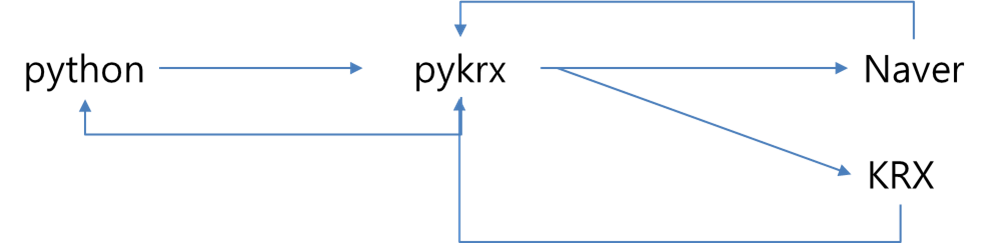

In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [ ]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,58900,69500,57800,66700,460991347
2020-12-31,67100,81300,67100,81000,529998852
2021-01-31,81000,90000,80200,88800,207737907


In [ ]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-04,-1189876714363,69165156608,1031014166618,89697391137,0
2021-01-05,-536265643081,16098509714,728387733108,-208220599741,0
2021-01-06,-1369155503764,37370130195,1729261196142,-397475822573,0
2021-01-07,1033917002121,36342229807,-1183634539101,113375307173,0
2021-01-08,-1147931424901,63596153201,-559141825960,1643477097660,0
2021-01-11,-3743203896260,-31327947241,4492145003867,-717613160366,0
2021-01-12,-1723898682006,30388878033,2312445113552,-618935309579,0
2021-01-13,-372450411172,9868157834,169086090692,193496162646,0
2021-01-14,-1428981445508,38743362517,712730906649,677507176342,0


In [ ]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


## 1.3. 정규 표현식(Regular Expression)

참고


<figure>
<img src = 'https://miro.medium.com/max/700/1*Y-q0dkUClSW0dX6uuysnJQ.png'>
<figure>

<figure>
<img src = 'https://miro.medium.com/max/700/1*c__WeRlFyGY_-7LeKQkNnQ.png'>
<figure>



<figure>
<img src = 'https://miro.medium.com/max/661/1*6pIp6zuIoRHUOXjEDDUNCA.png'>
<figure>

In [1]:
import re
r = re.compile("a.c")
r.search("kkk")
# 아무런 결과도 출력되지 않는다.
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [2]:
r = re.compile("ab?c")
r.search("abbc")
# 아무것도 출력되지 않음
r.search("abc")
# b가 있는 것으로 판단하여 abc를 매치함.

<re.Match object; span=(0, 3), match='abc'>

In [3]:
r.search("ac")
# b가 없는 것으로 판단하여 ac를 매치함.

<re.Match object; span=(0, 2), match='ac'>

- 0개 이상 문자 매치


In [4]:
r = re.compile("ab*c")
r.search("a")
# 아무것도 출력되지 않음.

In [5]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [6]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [7]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

- '+' : 최소 1번 이상 출현


In [8]:
r = re.compile('ab+c')
r.search("ac")
# 아무것도 출력되지 않는다.

r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

- ' ^': 시작 문자 지정

In [9]:
r = re.compile('^a')
r.search('bbc')
# 아무것도 출력되지 않음
r.search('ab')

<re.Match object; span=(0, 1), match='a'>

{숫자}: 출현 빈도 지정
{숫자1, 숫자2}
{숫자,}

문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타낸다. 예를 들어 정규 표현식이 ab{2}c라면 a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치한다.

In [10]:
r = re.compile("ab{2}c")
r.search("ac")
# 아무것도 출력되지 않는다.
r.search("abc")
# 아무것도 출력되지 않는다.
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [11]:
r.search("abbbbbc")

In [12]:
r = re.compile("ab{2,8}c")
r.search('ac')
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [13]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [14]:
r.search("abbbbbbbbbbbbbc")

In [15]:
r = re.compile("a{2,}bc")
r.search("bc")
# 아무런 결과도 출력되지 않음
r.search("aa")
# 아무런 결과도 출력되지 않음
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [16]:
r.search("aaaaabc")

<re.Match object; span=(0, 7), match='aaaaabc'>

[] : [ ] 안 문자들과 매치
[a-zA-Z]
[0–9]

In [17]:
r = re.compile("[abc]")
r.search('zzz')
# 아무것도 출력되지 않음
r.search('a')

<re.Match object; span=(0, 1), match='a'>

In [18]:
r.search('acg')

<re.Match object; span=(0, 1), match='a'>

In [19]:
r.search('babo')

<re.Match object; span=(0, 1), match='b'>

[^문자]:  ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치

In [20]:
r = re.compile('[^abc]')
r.search("a")
# 아무것도 출력되지 않음
r.search("ahoho")

<re.Match object; span=(1, 2), match='h'>

In [21]:
r.search("1st")

<re.Match object; span=(0, 1), match='1'>

- re.match()와 re.search()의 차이
 - search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규표현식과 매치하는지를 확인
문자열 중간에 찾을 패턴이 있다고 하더라도, match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음

In [22]:
r = re.compile("ab.")
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

In [23]:
r.match("kkkabc")
# 아무것도 출력되지 않음

In [24]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

 - re.split(): 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴

In [25]:
text = "사과 딸기 수박 멜론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '멜론', '바나나']

In [26]:
text = """사과
딸기
수박
멜론
바나나"""
re.split("\n", text)

['사과', '딸기', '수박', '멜론', '바나나']

In [27]:
text = "사과+딸기+수박+멜론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '멜론', '바나나']

 - re.findall(): 정규 표현식과 매치되는 모든 문자열들을 리스트로 반환

In [28]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
re.findall("\d+", text)

['010', '1234', '1234', '30']

In [29]:
re.findall("\d+", "문자열입니당.")

[]

 - re.sub()

In [30]:
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

정규 표현식 텍스트 전처리 연습

In [31]:
text = """100 John    PROF
101 James    STUD
102 Mac    STUD"""
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

'\s+' 는 공백 여러 개를 기준으로 split


In [32]:
re.findall('\d+', text)

['100', '101', '102']

'\d+' 숫자 문자열을 반환

In [33]:
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [34]:
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

In [35]:
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

#2. 뉴스 수집

In [37]:
from bs4 import BeautifulSoup
import urllib
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2023.04.01"
enddate = "2023.04.01"
searchword = "전기차" #검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+urllib.parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_url = soup.select('a[href^="https://n.news.naver.com/mnews/article/"]')  #클래스 표시
    t_len = len(t_url)
    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                url = soup.select('a[href^="https://n.news.naver.com/mnews/article/"]')[j]['href']
                urls.append(url)
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls})
#result.Url[0] #1행 출력

In [38]:
"news.naver.com" in result.Url[0]

True

 - 본문 수집

In [39]:
articles = []
dates = []
likes = []

for i in result.Url:
   try:
    if( "news.naver.com" in i ):
     print(i)
     time.sleep(0.45)
     html = urllib.request.urlopen(i).read()
     soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article', {'id': 'dic_area'})
    for tag in article.find_all(['span', 'strong']):
      tag.decompose()
    for br in article.find_all('br'):
      br.replace_with('\n')
    news = article.get_text(strip=True, separator='\n')
    articles.append(news)
    time_span = soup.find('span', class_='_ARTICLE_DATE_TIME')
    news_time = time_span.get('data-date-time')
    dates.append(news_time)
   except Exception as e:
    print(e)
    continue


https://n.news.naver.com/mnews/article/008/0004869466?sid=101
https://n.news.naver.com/mnews/article/277/0005239464?sid=101
https://n.news.naver.com/mnews/article/023/0003755355?sid=110
https://n.news.naver.com/mnews/article/020/0003488833?sid=105
https://n.news.naver.com/mnews/article/353/0000044615?sid=101
https://n.news.naver.com/mnews/article/015/0004827510?sid=101
https://n.news.naver.com/mnews/article/011/0004174019?sid=104
https://n.news.naver.com/mnews/article/015/0004827508?sid=101
https://n.news.naver.com/mnews/article/011/0004174018?sid=101


In [40]:
# 수집된 내용을 표로 정리하기, news컬럼, date컬럼
train_data = pd.DataFrame({'articles':articles, 'date':dates})
train_data

,articles,date
0,[편집자주] 지난해 원자재 가격 급상승으로 전세계 증시가 충격을 먹었습니다. 갈 곳...,2023-04-01 10:00:00
1,한국에서 생산한 양극재·음극재 등 배터리 소재가 들어간 전기차도 미국에서 보조금을 ...,2023-04-01 05:01:07
2,지난 30여 년간 줄곧 흑자를 냈던 대(對)중국 무역이 올 들어 적자로 돌아섰다. ...,2023-04-01 03:09:01
3,전기차의 급속 충전 성능을 높이거나 주행거리를 늘리려면 배터리 열을 안정적으로 관리...,2023-04-01 03:01:50
4,미국의 인플레이션 감축법(IRA) 중 전기차 세액공제와 관련한 세부 규정이 발표됐다...,2023-04-01 01:00:01
5,"미국 인플레이션 감축법(IRA) 세부지침이 31일 발표됨에 따라 현대자동차, LG에...",2023-04-01 00:09:01
6,[서울경제]\n미국 정부가 인플레이션감축법(IRA) 세부 지침에서 미국과 자유무역협...,2023-04-01 00:05:01
7,한국산 양극재(양극 활물질)와 음극재(음극 활물질)로 제조된 배터리가 들어간 전기자...,2023-04-01 00:05:03
8,[서울경제]\n미국이 인플레이션감축법(IRA)에 따른 전기차 배터리 세부 지침에서 ...,2023-04-01 00:04:01


#3. Selenium 사용하기
-
- 헤드리스 크롬 설치 → 드라이버 준비 → JS 렌더링 대기 → 클릭/페이지네이션 → 무한스크롤 → CSV 저장/스크린샷

In [41]:
# 필수 패키지
!pip -q install selenium webdriver-manager pandas bs4

# 크롬 설치 (Colab용)
!apt-get update -y
!apt-get install -y wget gnupg unzip
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb || apt-get -fy install


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 37.3 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [5,36

In [42]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

def create_driver(headless: bool = True):
    chrome_options = Options()
    if headless:
        chrome_options.add_argument("--headless=new")  # 최신 헤드리스 모드
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--window-size=1366,768")
    # 필요시 UA 지정
    # chrome_options.add_argument("--user-agent=Mozilla/5.0 ...")

    # Colab에 설치된 Chrome 바이너리 명시 (안정)
    chrome_options.binary_location = "/usr/bin/google-chrome"

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

driver = create_driver(headless=True)
driver.get("https://example.com")
print(driver.title)
driver.quit()


Example Domain


- 기본 패턴: JS 렌더링 대기 → 요소 추출 → CSV 저장

In [43]:
import time, pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = create_driver(headless=True)
driver.get("https://quotes.toscrape.com/js/")

# ① JS 렌더링 대기
WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".quote"))
)

# ② 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")
rows = []
for q in soup.select(".quote"):
    text = q.select_one(".text").get_text(strip=True)
    author = q.select_one(".author").get_text(strip=True)
    tags = [t.get_text(strip=True) for t in q.select(".tag")]
    rows.append({"text": text, "author": author, "tags": ", ".join(tags)})

df = pd.DataFrame(rows)
df.head()
df.to_csv("/content/quotes_js.csv", index=False, encoding="utf-8-sig")
print("저장 완료: /content/quotes_js.csv")

driver.quit()


저장 완료: /content/quotes_js.csv


- 페이지네이션

In [44]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = create_driver(headless=True)
driver.get("https://news.ycombinator.com/")

all_items = []

for page in range(1, 4):  # 1~3페이지
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".athing"))
    )
    soup = BeautifulSoup(driver.page_source, "html.parser")

    for row in soup.select(".athing"):
        rank = row.select_one(".rank")
        title_link = row.select_one(".titleline a")
        if title_link:
            all_items.append({
                "page": page,
                "rank": rank.get_text(strip=True) if rank else "",
                "title": title_link.get_text(strip=True),
                "url": title_link.get("href", "")
            })

    # 다음 페이지로 (More 버튼 클릭)
    more = driver.find_elements(By.LINK_TEXT, "More")
    if not more:
        break
    more[0].click()
    time.sleep(1)

import pandas as pd
df_hn = pd.DataFrame(all_items)
df_hn.to_csv("/content/hn_3pages.csv", index=False, encoding="utf-8-sig")
print("저장 완료: /content/hn_3pages.csv")

driver.quit()


저장 완료: /content/hn_3pages.csv


- 무한스크롤

In [45]:
import time, pandas as pd
from bs4 import BeautifulSoup

def infinite_scroll_collect(url, item_selector, max_rounds=20, wait_sec=1.0):
    driver = create_driver(headless=True)
    driver.get(url)
    last_height = driver.execute_script("return document.body.scrollHeight")
    rounds = 0

    while rounds < max_rounds:
        # 맨 아래까지 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(wait_sec)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # 더 이상 로딩되는 게 없으면 종료
            break
        last_height = new_height
        rounds += 1

    # 파싱
    soup = BeautifulSoup(driver.page_source, "html.parser")
    items = soup.select(item_selector)
    driver.quit()
    return items

# 예시: 데모용(실제 타겟 사이트의 셀렉터로 바꿔 쓰세요)
items = infinite_scroll_collect(
    url="https://news.ycombinator.com/",
    item_selector=".athing",
    max_rounds=5,
    wait_sec=0.7
)
print("수집된 요소 수:", len(items))


수집된 요소 수: 30


- 버튼클릭/스크린샷 등

In [47]:
import os

In [48]:
driver = create_driver(headless=True)
os.makedirs("/content/shots", exist_ok=True)

try:
    driver.get("https://the-internet.herokuapp.com/dynamic_loading/2")

    # Start 버튼 클릭
    start_btn = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "#start button"))
    )
    start_btn.click()

    # 로딩 후 결과 텍스트가 나타날 때까지 대기
    result = WebDriverWait(driver, 15).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR, "#finish"))
    )
    print("결과 텍스트:", result.text)

    shot_path = "/content/shots/dynamic_loading.png"
    driver.save_screenshot(shot_path)
    print("스크린샷 저장:", shot_path)
finally:
    driver.quit()


결과 텍스트: Hello World!
스크린샷 저장: /content/shots/dynamic_loading.png


#4. Playwright
- (마이크로소프트가 만든) 오픈소스 브라우저 자동화 라이브러리이자 도구 세트
 - 자동 대기(auto-wait), 강력한 Locator(get_by_*, :has()), 트레이싱/비디오, 네트워크 인터셉트, 멀티 콘텍스트(독립 세션)
- 크로스 브라우저: Chromium / Firefox / WebKit 지원, headless·headed 모두 OK
- 자동 대기(Auto-wait): 클릭/입력/네비게이션 시 DOM 안정화까지 자동 대기 → flaky ↓
- Locator 기반 셀렉터: get_by_role, get_by_text, CSS/XPath, :has() 등 강력
- 멀티 컨텍스트: 독립 쿠키/세션(시크릿) 동시 실행, 모바일/지오로케이션/타임존 에뮬
- 네트워크 인터셉트: 요청/응답 가로채기, mock 응답, 리소스 차단
- 트레이싱/스크린샷/비디오: 디버깅/재현성 ↑ (테스트 자동화에도 최적)
- Colab/Jupyter 친화: Async API 권장(이벤트 루프 충돌 없음)

In [49]:
!pip -q install playwright
!playwright install --with-deps chromium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 30.6 MB/s eta 0:00:00
Installing dependencies...
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Get:13 https://dl.google.com/linux/chrome/deb

- 기본 예

In [58]:
from playwright.async_api import async_playwright
async with async_playwright() as p: #비동기, await 사용
    b = await p.chromium.launch(headless=True)
    page = await (await b.new_context()).new_page()
    await page.goto("https://example.com", wait_until="networkidle")
    print(await page.title()); await b.close()


Example Domain


- 기본 예2

In [59]:
from playwright.async_api import async_playwright

async def run():
    async with async_playwright() as p:          # 시작/정리 자동
        browser = await p.chromium.launch()   #크롬의 오픈소스 버전, 새로 설치, p.chromium은 그 Chromium 계열 브라우저를 제어하는 핸들
        page = await (await browser.new_context()).new_page()
        await page.goto("https://example.com", wait_until="networkidle")
        title = await page.title()
        await browser.close()                    # 컨텍스트 정리 + 브라우저 닫기(중복 호출 OK)
    return title


- 기본 예2

In [50]:
import pandas as pd

from playwright.async_api import async_playwright

async def scrape_quotes(max_pages=3):
    async with async_playwright() as p:
        # 1) 브라우저/컨텍스트/페이지
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context(
            viewport={"width": 1280, "height": 800},
            user_agent="Mozilla/5.0 (X11; Linux x86_64) Playwright/Colab"
        )
        page = await context.new_page()
        page.set_default_timeout(15000)  # 15s

        rows = []
        await page.goto("https://quotes.toscrape.com/js/", wait_until="networkidle")

        for _ in range(max_pages):
            # 2) 동적 렌더링 대기
            await page.wait_for_selector(".quote")

            # 3) 데이터 추출
            for q in await page.locator(".quote").all():
                text = await q.locator(".text").inner_text()
                author = await q.locator(".author").inner_text()
                tags = await q.locator(".tag").all_inner_texts()
                rows.append({"text": text, "author": author, "tags": ", ".join(tags)})

            # 4) 페이지네이션 (없으면 종료)
            next_btn = page.locator("li.next >> a")
            if await next_btn.count() == 0:
                break
            await next_btn.click()

        # 5) 스크린샷 저장
        import os
        os.makedirs("/content/shots", exist_ok=True)
        await page.screenshot(path="/content/shots/quotes.png", full_page=True)

        await browser.close()
        return rows

rows = await scrape_quotes(max_pages=5)
df = pd.DataFrame(rows)
df.to_csv("/content/quotes_playwright.csv", index=False, encoding="utf-8-sig")
print("Saved:", len(df), "rows")
print("Files: /content/shots/quotes.png , /content/quotes_playwright.csv")


Saved: 50 rows
Files: /content/shots/quotes.png , /content/quotes_playwright.csv


- form 입력/버튼 클릭 및 네비게이션

In [52]:
import nest_asyncio, asyncio
nest_asyncio.apply()

In [57]:
from urllib.parse import quote_plus, urljoin
from playwright.async_api import async_playwright

async def search_wikipedia_direct(q="Retrieval-augmented generation", max_results=5):
    async with async_playwright() as p:
        b = await p.chromium.launch(headless=True)
        ctx = await b.new_context()
        page = await ctx.new_page()
        url = f"https://en.wikipedia.org/w/index.php?title=Special:Search&ns0=1&limit=50&search={quote_plus(q)}"
        await page.goto(url, wait_until="domcontentloaded")

        items = []
        if await page.locator(".mw-search-results").count():
            for a in (await page.locator(".mw-search-result-heading a").all())[:max_results]:
                href = await a.get_attribute("href")
                items.append({"title": await a.inner_text(), "url": urljoin("https://en.wikipedia.org", href or "")})
        else:
            await page.wait_for_selector("#firstHeading")
            items.append({"title": await page.locator("#firstHeading").inner_text(), "url": page.url})
        await b.close()
        return items


- 이미지 차단으로 속도 개선

In [65]:
from playwright.async_api import async_playwright

async def fast_text_only(url):
    async with async_playwright() as p:
        b = await p.chromium.launch()
        ctx = await b.new_context()

        # 이미지/CSS 차단 (사이트에 따라 과도 차단 시 레이아웃 깨질 수 있음)
        await ctx.route("**/*", lambda route: route.abort() if route.request.resource_type in {"image","media","font"} else route.continue_())

        page = await ctx.new_page()
        await page.goto(url, wait_until="networkidle")
        html = await page.content()
        await b.close()
        return html

html = await fast_text_only("https://news.ycombinator.com/")
len(html)


34926

In [66]:
html

'<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?sJrC2FNC7onakFWpNx3H"><link rel="icon" href="y18.svg"><link rel="alternate" type="application/rss+xml" title="RSS" href="rss"><title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef"><tbody><tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tbody><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.svg" width="18" height="18" style="border:1px white solid; display:block"></a></td><td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b><a href="newest">new</a> | <a href="front">past</a> | <a href="newcomments">comments</a> | <a href="ask">ask</a> | <a 

In [70]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

# html 변수는 이미 fast_text_only()로 받아온 문자열이라고 가정
soup = BeautifulSoup(html, "html.parser")

base = "https://news.ycombinator.com/"
rows = []

# HN은 각 글이 tr.athing, 그 다음 tr에 메타정보(td.subtext)가 옵니다.
for tr in soup.select("tr.athing"):
    # 제목/링크/순위
    a = tr.select_one("span.titleline > a") or tr.select_one("a.storylink")  # (구버전 호환)
    title = a.get_text(strip=True) if a else ""
    url = urljoin(base, a.get("href", "")) if a else ""
    rank_el = tr.select_one("span.rank")
    rank = rank_el.get_text(strip=True).rstrip(".") if rank_el else None

    # 다음 행의 메타 정보
    sub = tr.find_next_sibling("tr")
    subtext = sub.select_one("td.subtext") if sub else None

    points = author = age = comments = None
    if subtext:
        score_el = subtext.select_one("span.score")
        if score_el:
            # "123 points" → 123
            try:
                points = int(score_el.get_text(strip=True).split()[0])
            except Exception:
                points = score_el.get_text(strip=True)

        user_el = subtext.select_one("a.hnuser")
        author = user_el.get_text(strip=True) if user_el else None

        age_el = subtext.select_one("span.age a")
        age = age_el.get_text(strip=True) if age_el else None

        # 마지막 링크가 보통 "X comments" 또는 "discuss"
        links = subtext.find_all("a")
        if links:
            ctext = links[-1].get_text(strip=True)
            if "comment" in ctext or "discuss" in ctext:
                comments = ctext

    rows.append({
        "rank": rank,
        "title": title,
        "url": url,
        "points": points,
        "author": author,
        "age": age,
        "comments": comments,
    })

df = pd.DataFrame(rows)
df.head()


,rank,title,url,points,author,age,comments
0,1,Show HN: We started building an AI dev tool bu...,https://www.youtube.com/watch?v=sRPnX_f2V_c,47,maxraven,1 hour ago,28 comments
1,2,"Show HN: Whispering – Open-source, local-first...",https://github.com/epicenter-so/epicenter/tree...,95,braden-w,3 hours ago,24 comments
2,3,Left to Right Programming,https://graic.net/p/left-to-right-programming,80,graic,3 hours ago,68 comments
3,4,Show HN: I built an app to block Shorts and Reels,https://scrollguard.app/,377,adrianhacar,8 hours ago,145 comments
4,5,FFmpeg Assembly Language Lessons,https://github.com/FFmpeg/asm-lessons,247,flykespice,6 hours ago,73 comments
